<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg"  width=400 height=300></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

<h3 style="text-align: center;"><b> Градиентный спуск. Линейные модели.</b></h3>

В этом ноутбуке мы попробуем реализовать свой градиентный спуск на основе модели линейной регрессии и сравним свою реализацию с 

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import scipy.linalg as sla
import matplotlib.pyplot as plt
%matplotlib inline

### Построение модели

Модель нашей линейной регрессии:

In [3]:
# в этих переменных будут лежать веса, которые мы оценим
# W - веса модели, на которые умножаются признаки
W = None
# b - bias, который добавляется к итоговому результату
b = None

def mse(preds, y):
    """
    Возвращает среднеквадратичную ошибку между preds и y.
    """
    return ((preds - y)**2).mean()

def solve_weights(X, y):
    """
    Находит параметры W,b по методу наименьших квадратов для X и y.
    Решает систему линейных уравнений, к которым приводит метод наименьших 
    квадратов, для признаков X и значений y.
    """
    # ключевое слово global позволяет нам использовать глобальные переменные,
    # определенные в начале ячейки
    global W, b
    
    
    N = X.shape[0]
    # добавляем к признакам фиктивную размерность, чтобы было удобнее находить bias
    bias = np.ones((N, 1))
    X_b = np.append(bias, X, axis=1)
    
    # используем формулу из метода наименьших квадратов
    # W_full сожержит коэффициенты W и b, так как мы добавили фиктивную размерность к признакам
    W_full = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    
    # мы разделяем bias, который лежал в начале вектора W_full, и веса модели W
    W = W_full[1:]
    b = np.array([W_full[0]])
    # нам не нужно возвращать W и b, так как они уже лежат в глобальных переменных
    
def grad_descent(X, y, lr, num_iter=100):
    """
    Находит приближенные значения параметров модели, используя градиентный спуск.
    Функции потерь (ошибки) для данной реализации спуска - сумма квадратов ошибки.
    Возвращаемое значение - список значений ффункции потерь на каждом шаге.
    """
    # ключевое слово global позволяет нам использовать глобальные переменные,
    # определенные в начале ячейки
    global W, b
    W = np.random.rand(X.shape[1])
    b = np.array(np.random.rand(1))
    
    losses = []
    
    N = X.shape[0]
    for iter_num in range(num_iter):
        preds = predict(X)
        losses.append(mse(preds, y))
        
        w_grad = np.zeros_like(W)
        b_grad = 0
        for sample, prediction, label in zip(X, preds, y):
            w_grad += 2 * (prediction - label) * sample
            b_grad += 2 * (prediction - label)
            
        W -= lr * w_grad
        b -= lr * b_grad
    return losses

def predict(X):
    """
    Предсказывает значения y, используя текущие параметры модели W и b
    """
    global W, b
    return np.squeeze(X@W + b.reshape(-1, 1))

Подробнее рассмотрим формулы, которые используются в градиентном спуске.
Наша функция потерь 
$$L(\hat{y}) = \sum_{i = 1}^{N}( \hat{y}_{i} - y_{i} )^{2}$$
Найдем производную:
$$\frac{dL(\hat{y})}{d\hat{y}} = \sum_{i = 1}^{N}2(\hat{y}_{i} - y_{i} )$$
Где $\hat{y}$ это вектор предсказаний, а $y$ - вектор значений. Если у нас есть только два признака, то по определению нашей модели:
$$\hat{y}_{i} = W_1 * x_{i1} + W_2 * x_{i2} + b$$

Подставим в формулу для функции потерь и возьмём производную:
$$\frac{\partial L(\hat{y})}{ \partial W_1} = \sum_{i = 1}^{N} \frac{\partial (( \hat{y}_{i} - y_{i} )^{2})}{\partial \hat{y_i}} \times \frac{\partial \hat{y_i}}{\partial W_1}  =  
\sum_{i = 1}^{N} 2 (\hat{y_i} - y) \times x_{i1} $$


В формуле есть суммирование по всем строчкам $X$ ($x_i$ это $i$-ая строчка X, в которой хранятся признаки для $i$-го наблюдения), в коде ему соответствует внешний цикл, итерирующийся по всем наблюдениям. Внутренний цикл нужен для получения производных по всем весам $W_i$, которых в общем случае может быть произвольное количество.


В итоге выполнения кода 
$$w\_grad = (\frac{\partial L(\hat{y})}{\partial W_1} , \frac{\partial L(\hat{y})}{\partial W_2}, \frac{\partial L(\hat{y})}{\partial W_3} ,...) = \nabla L$$ 

Для обновления весов мы вычитаем градиент, передвигаясь в направлении скорейшего убывания функции.
$$W = W - lr \cdot \nabla L$$

### Получение данных

In [4]:
def generate_data(range_, a, b, std, num_points=100):
    """Генерирует данные в заданном промежутке, которые подчиняются зависимости y = a*x + b + е,
    где е - нормально распределено со стандартным отклонением std и нулевым средним."""
    X_train = np.random.random(num_points) * (range_[1] - range_[0]) + range_[0]
    y_train = a * X_train + b + np.random.normal(0, std, size=X_train.shape)
    
    return X_train, y_train

In [5]:
# Зададим параметры для искусственных данных
real_a = 0.34
real_b = 13.7
real_std = 7

# Генерируем данные для промежутка от 0 до 150 с параметрами, которые мы задали выше
X_train, y_train = generate_data([0, 150], real_a, real_b, real_std)

# просто выведем табличку с данными
pd.DataFrame({'X': X_train, 'Y': y_train}).head()

,X,Y
0,111.534705,51.716495
1,85.239429,37.831549
2,53.814066,30.029320
3,75.162333,42.288749
4,107.535311,46.426351


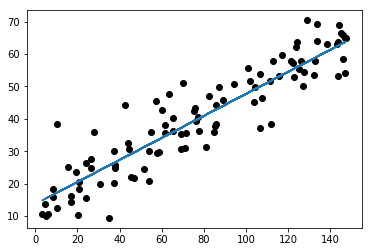

In [6]:
plt.scatter(X_train, y_train, c='black')
plt.plot(X_train, 0.34*X_train+13.7)
plt.show()

### Решение с помощью линейной алгебры

In [7]:
# Используем функцию, написанную выше, чтобы найти W и b, с помощтю метода наименьших квадратов
solve_weights(X_train.reshape(-1, 1), y_train)

In [8]:
# Полученные веса лежат в глобальных переменных, выведем их
W, b

(array([0.34730505]), array([13.31685994]))

Полученные веса очень похожи на те, которые мы задавали при генерации данных. Значит модель получилась хорошей.

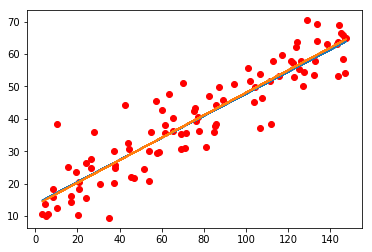

In [10]:
# Выведем данные, истинную зависимость и полученную нами с помощью метода наименьших квадратов
plt.scatter(X_train, y_train, c='r')
plt.plot(X_train, 0.34*X_train+13.7)
plt.plot(X_train, np.squeeze(X_train.reshape(-1, 1) @ W + b.reshape(-1, 1)))
plt.show()

### Решение с помощью градиентного спуска

In [13]:
# Найдем параметры с помощью градиентного спуска
# чтобы проследить за обучением, мы записываем значение функции ошибки на каждом шаге и после выводим
losses = grad_descent(X_train.reshape(-1, 1), y_train, 1e-9, 15000)

In [14]:
# Полученные веса лежат в глобальных переменных, выведем их
W, b

(array([0.47041938]), array([0.70138476]))

Веса модели получились не похожи, на то, что мы задавали при генерации данных. Модель намного хуже.

Стоит отметить, что хуже всего был подобран свободный член b, это связано с тем, что данные не нормализованы и параметры a и b имеют очень разные модули, а шаги, которые делает градиентный спуск для обоих параметров одного порядка. Это приводит к тому, что меньший по модулю параметр a быстро подбирается, а параметр почти b перестает изменяться.

([<matplotlib.lines.Line2D at 0x243d4f76748>], 81.73808434389932)

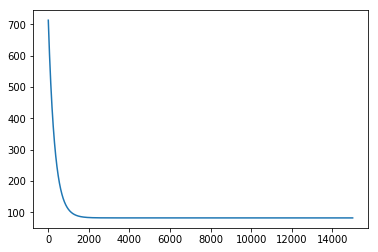

In [15]:
# Выведем график функции потерь 
plt.plot(losses), losses[-1]

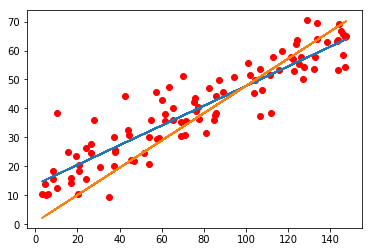

In [16]:
# Выведем данные, истинную зависимость и полученную нами
plt.scatter(X_train, y_train, c='r')
plt.plot(X_train, real_a * X_train + real_b)
plt.plot(X_train, np.squeeze(X_train.reshape(-1, 1) @ W + b.reshape(-1, 1)))
plt.show()

Градиентный спуск восстановил зависимость хуже, чем метод наименьших квадратов, это вызвано тем, что 
* данные не **нормализованы** (подробнее о нормализации в домашнем ноутбуке).
* в **методе наименьших квадратов** мы получали решение **аналитически**, поэтому оно гарантировано является наилучшим, в то время как градиентный спуск находит решение лишь приближенно. 

Возникает вопрос, зачем использовать **градиентный спуск**, если он хуже **аналитических** мтеодов? Дело в том, что оптимизация большого количества весов в **нейронных сетях** сликшом сложная задача, которая не может быть решена **аналитически**.

### Данные посложнее

Загрузим с помощью **pandas** реальные данные и попробуем найти параметры зависимости с помощью метода наименьших квадратов и градиентного спуска, как и в предыдущем примере (так как наш код универсален, нам просто нужно просто вызвать те же функции).

In [17]:
df = pd.read_csv("./data.csv")

In [18]:
# так как данные многомерные, мы не можем построить график, как в предыдущем примере, 
# чтобы увидеть зависимость глазами. Поэтому мы просто выведем первые строки таблицы.
df.head()

,Index,A1,A2,A3,A4,B
0,1,75,91,6,85,4815
1,2,6,48,48,48,234
2,3,5,60,24,40,160
3,4,74,48,8,86,4794
4,5,10,74,70,11,659


In [19]:
# разделим данные на признаки и значения
data, label = np.array(df)[:, 1:5], np.array(df)[:, 5]

### Решение с помощью линейной алгебры

In [20]:
# Используем функцию, написанную выше, чтобы найти W и b, с помощтю метода наименьших квадратов
solve_weights(data, label)

In [21]:
# Полученные веса лежат в глобальных переменных, выведем их
W, b

(array([ 3.29211245,  6.54097099, 24.3858116 , -7.47819654]),
 array([2030.27050104]))

In [22]:
# Выведем значение функции ошибки, чтобы позже сравнить с результатом градиентного спуска
mse(predict(data), label)

3731984.960573224

### Решение с помощью градиентного спуска

In [23]:
# Найдем параметры с помощью градиентного спуска
# чтобы проследить за обучением, мы записываем значение функции ошибки на каждом шаге и после выводим
losses = grad_descent(data, label, 1e-9, 500)

In [25]:
# Полученные веса лежат в глобальных переменных, выведем их
W, b

(array([11.71278391, 11.60690355, 11.38080503,  6.42142803]),
 array([1.13708785]))

([<matplotlib.lines.Line2D at 0x243d4f56128>], 5574597.621078077)

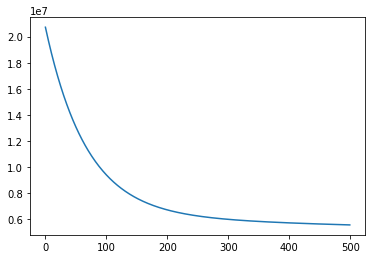

In [26]:
# Выведем график функции потерь 
plt.plot(losses), losses[-1]

In [27]:
# Выведем значение функции ошибки
mse(predict(data), label)

5573261.365177984

Как мы видим, **градиентный спуск** опять нашел значительно более плохое решение. Если нормализовать данные, то **градиентный спуск** будет сходиться лучше и разница будет не такой заметной. 

В домашнем задании вы научитесь нормализовывать данные. После этого вы можете вернуться в этот ноутбук и запустить градиентный спуск, предварительно использовав нормализацию.